In [63]:
# Prob 1.1
import math
def f(x):
    return ((1+x)-1)/x

print(f(math.pow(10,-15)))
print(f(math.pow(10,-16)))

1.1102230246251565
0.0


这是因为两个相近数字相减引入了截断误差；
第二个是因为大数字吞掉了小数字(10e-16太小了)

In [59]:
#Prob 1.2
n = 1
while(True):
    x = math.pow(2,(-1)*n)
    if(0.5+x<=0.5):
        print("Found least n = ", n-1, "in which x = ", math.pow(2,(-1)*(n-1)))
        break
    n+=1

Found least n =  53 in which x =  1.1102230246251565e-16


In [57]:
#Prob 2
#Approaching exp(x) using the first N elements in Taylor expansion
import numpy as np
import matplotlib.pyplot as plt
def factorial(n):#calculating factorial n!
    fac = 1
    if(n==0):
        return 1
    for i in range(1,n+1):
        fac *= i
    return fac
    
def approach_exp(x,N):
    sum = 0
    for i in range(0, N+1):
        sum+=math.pow(x,i)/factorial(i)
    return sum

def getre(x):
    relative_error = np.zeros(21)
   # print(relative_error[19])
    for N in range(1,21):
        relative_error[N] = abs(math.exp(x)-approach_exp(x,N))/math.exp(x)
    return relative_error

def makescatter(x):
    relative_error = getre(x)
    Ns = np.arange(0, 21)
   # print(Ns)
   # print("!!!!!!", Ns[1:21])
    plt.scatter(Ns[1:21], relative_error[1:21])
    

[0.         0.9995006  0.9972306  0.98966395 0.97074731 0.93291404
 0.86985858 0.77977935 0.66718032 0.54207029 0.41696025 0.30322385
 0.20844352 0.13553558 0.08345847 0.0487404  0.02704161 0.01427761
 0.0071865  0.00345434 0.00158826]


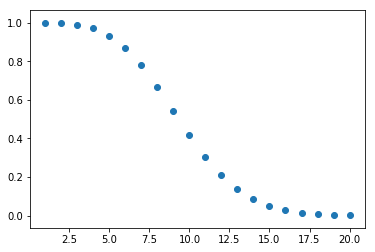

In [58]:
print(getre(10))
makescatter(10)

这是正常的逼近，SN(x)逐点收敛到exp(x)

[       0.           198239.19215326   903084.09758708  2767993.53488071
  6409700.54628875 11945687.61605017 18646625.98784804 25056679.16057798
 29572452.27495455 31126582.65341493 29572452.27495455 25608488.56901771
 20375628.80095917 14996769.17594612 10269229.37898622  6574769.65763534
  3952729.74025314  2239916.96438714  1200442.31596857   610273.09474497
   295084.6106118 ]


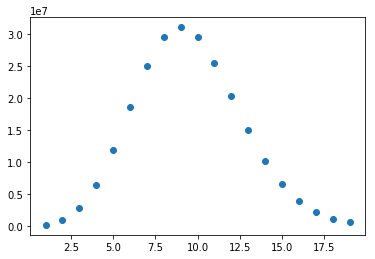

In [51]:
print(getre(-10))
makescatter(-10)

这里出现异常（中间一段变高）的原因是SN(x)当x<0时是交错级数，这使得SN(x)-exp(x)是震荡的，且exp(-10)很小，很小数相减出现了误差，当n比较小的时候现象比较显著，当n变大之后主要影响因素变成了fac(n)，误差变小。

改进：将x=-10的情形转化为一个趋近于较大的数，取倒数即可，即：
1/(SN(10)) -> exp(-10)

此时相对误差的表达式是 Er=abs((1/SN(10))-exp(-10))/exp(-10)

In [66]:
#Prob 3.1
#I(N) = e - N*I(N-1)
#I(0) = e-1

I = np.zeros(21)
I[0] = math.exp(1)-1
for N in range(1,21):
    I[N]=math.exp(1) - N*I[N-1]

print(I)
print("I[20] = ", I[20])

[   1.71828183    1.            0.71828183    0.56343634    0.46453646
    0.39559955    0.34468454    0.30549004    0.27436153    0.24902803
    0.22800152    0.21026516    0.19509991    0.18198305    0.17051906
    0.16049585    0.15034816    0.16236308   -0.20425356    6.5990995
 -129.26370813]
I[20] =  -129.26370813285942


[0.12380383 0.12380383 0.12380383 0.12380383 0.12380383 0.12380383
 0.12380383 0.12380383 0.12380383 0.12380383 0.12380383 0.12380383
 0.12380383 0.12380383 0.12380383 0.12380383 0.12380383 0.12380383
 0.12380383 0.12380383]


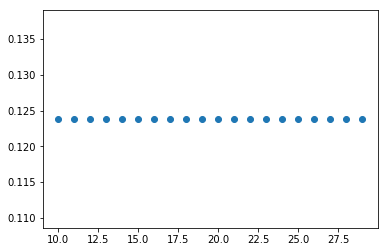

In [75]:
#Prob 3.2
II = np.zeros(101)
def getI(N):
    sum = 0
    for i in range(0, N+1):
        sum += 1/(factorial(i)*(20+1+i))
    return sum

for N in range(10, 31):
    II[N]=getI(N)

print(II[10:30]) 

plt.scatter(x=range(10,30) ,y=II[10:30])

使用级数截断的方法更适合，即使只考虑初始值的舍入误差lambda，在经过多次迭代之后该误差也会被不断累积变大。而级数截断的方法不会累积误差。

u_100 =  100.0


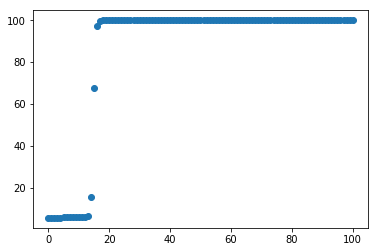

In [82]:
#Prob 4
def getun(alpha, beta, gamma, n):
    a = alpha*math.pow(100,n+1)+beta*math.pow(6,n+1)+gamma*math.pow(5,n+1)
    b = alpha*math.pow(100,n)+beta*math.pow(6,n)+gamma*math.pow(5,n)
    return a/b

u = np.zeros(2000)

u[0]=getun(0,1,1,0)
u[1]=getun(0,1,1,1)



for i in range(2, 101):
    u[i] = 111-(1130-3000/u[i-2])/u[i-1]

plt.scatter(x= range(0, 101), y=u[0:101])

print("u_100 = ", u[100])

u[150] =  5.999999999998674


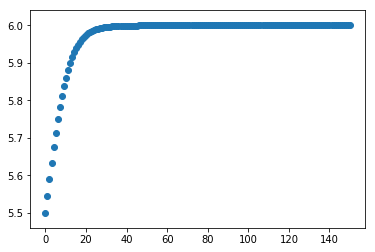

In [88]:
u = np.zeros(2000)
for i in range(0, 151):
    u[i]=getun(0,1,1,i)
plt.scatter(x = range(0,151), y=u[0:151])

print("u[150] = ", u[150])

精确的极限，带入alpha, beta, gamma之后即计算:
lim(n->+inf) (6^(n+1)+5^(n+1))/(6^n+5^n)=6
极限存在时，由递推公式解得u=100 or 5 or 6，由通解形式知道alpha != 0时总有
lim un=100，而任取u0与u1在计算时，总是转化成了alpha !=0的情况，从而计算出了100


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np


def pi(n,x,X) :
    if n==0:
        return 1
    return pi(n-1,x,X)*(x-X[n-1])

def N(n,x,X,Y):
    if n==0:
        return Y[0]
    return N(n-1,x,X,Y)+pi(n,x,X)*(Y[n]-N(n-1,X[n],X,Y))/pi(n,X[n],X)

def f(n,x):
    X= [-5+k*10/n for k in range(0,n+1)]
    Y=[]
    i=0
    while i<n+1:
        Y.append(1/(1+X[i]**2))
        i=i+1
    return N(n,x,X,Y)

x=np.linspace(-5,5,100)
y1=1/(1+x**2)
y2=f(4,x)
y3=f(10,x)
y4=f(14,x)
y5=f(20,x)

plt.figure()
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot(x,y5)

plt.show()